# 카카오톡 대화내용 분석 (1) - 대화내용 정제하기

# 데이터 로드 및 단어별 분포 확인

In [1]:
import pandas as pd

In [2]:
# 카카오톡 데이터를 불러와서 내용을 확인합니다.
data3 = pd.read_csv("외국계단톡방.csv", encoding='cp949', index_col=[0])
print(data3.info())
data3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 15107 entries, header to header
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       15107 non-null  object
 1   time       14842 non-null  object
 2   User       15107 non-null  object
 3   Message    14840 non-null  object
 4   Column1.1  15107 non-null  object
dtypes: object(5)
memory usage: 708.1+ KB
None


,date,time,User,Message,Column1.1
text_type,,,,,
header,2021-05-11,오전 10:18:00,알콜프리,면접 준비 중인데 답변을 어떻게 준비하면 좋을지 너무 감이 안 와서 큰일입니다.....,[알콜프리] [오전 10:18] 면접 준비 중인데 답변을 어떻게 준비하면 좋을지 너...
header,2021-05-11,오전 10:24:00,취뽀하자,본인의 강점+회사가 원하는 인재상에 맞춰서 준비해야져!,[취뽀하자] [오전 10:24] 본인의 강점+회사가 원하는 인재상에 맞춰서 준비해야져!
header,2021-05-11,오전 10:49:00,ggg,답변은 어떤 구조로 짜는게 좋은가요 ? 스크립트를 짜보려고 하는데 구조대로 말해보...,[ggg] [오전 10:49] 답변은 어떤 구조로 짜는게 좋은가요 ? 스크립트를 짜...
header,2021-05-11,오후 3:12:00,LABU,구글 서류전형 다음단계인 온라인테스트 본적 있는분 계실까요 ?,[LABU] [오후 3:12] 구글 서류전형 다음단계인 온라인테스트 본적 있는분 계...
header,2021-05-11,오후 3:17:00,취뽀하자,삭제된 메시지입니다.,[취뽀하자] [오후 3:17] 삭제된 메시지입니다.


In [3]:
# 메세지만 따로 추출
corpus = data3['Message']
corpus

text_type
header     면접 준비 중인데 답변을 어떻게 준비하면 좋을지 너무 감이 안 와서 큰일입니다.....
header                       본인의 강점+회사가 원하는 인재상에 맞춰서 준비해야져!
header     답변은 어떤 구조로 짜는게 좋은가요 ? 스크립트를 짜보려고 하는데 구조대로 말해보...
header                   구글 서류전형 다음단계인 온라인테스트 본적 있는분 계실까요 ?
header                                          삭제된 메시지입니다.
                                ...                        
header          아마도 비슷한 산업군에서 짧게라도 인턴을 한 것을 좋게 봐주셨던 것 같아요!!
header     그리고 숨고로도 1일과외 찾으실 수는 있는데 약간 모르겠어여 ㅠㅠ 숨고는 뭔가 믿...
header     저도 방금 숨고에 컨설팅 신청 했는데 바로 연락왔더라구요!!!! 근데 그 분은 B...
header     악마는 프라다를 입는다 읽어야할까요 ?ㅋㅋㅋㅋㅋ암튼 유튜브나 이런거 최대한 찾아보...
header                                           ㅎㅎㅎ 넵^^!!!
Name: Message, Length: 15107, dtype: object

In [4]:
# 데이터 전처리를 위한 전체 데이터의 특징을 빈도분석으로 파악

import nltk

total_tokens = [token for msg in corpus for token in str(msg).split()]
print(len(total_tokens))

79658


In [5]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

36054
[('혹시', 619), ('저는', 401), ('저도', 389), ('ㅠㅠ', 352), ('너무', 287), ('면접', 278), ('nan', 267), ('다', 259), ('근데', 256), ('더', 255)]


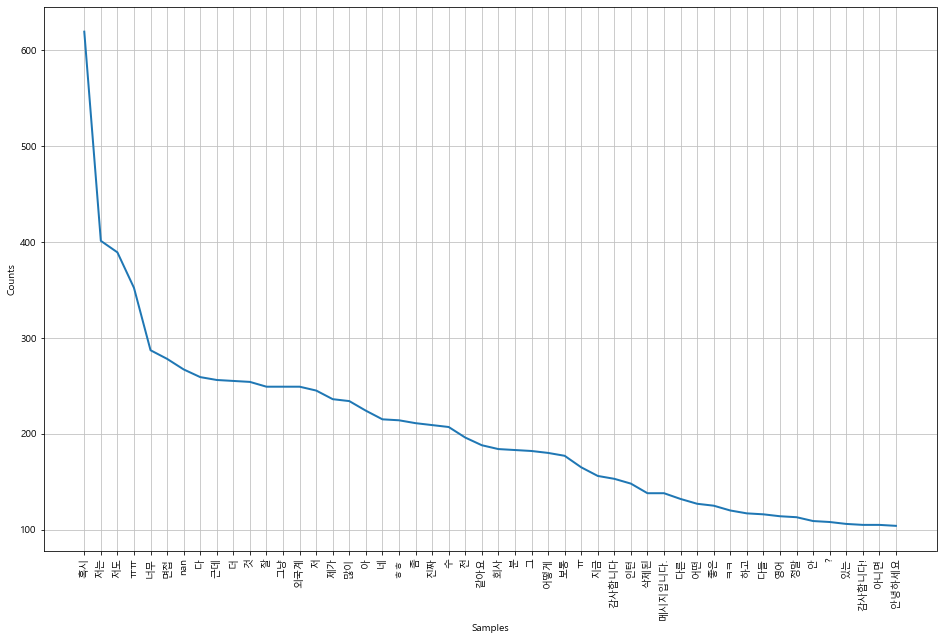

In [6]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

# 사용할 함수 지정 (클리닝, 토크나이저 등)

In [7]:
# MeCab 함수 설정

"""
    Parsing 규칙의 문제점, split을 "," 기준으로 하는데, token이 "," 인 경우에는 쉼표만 잘려서 나오기 때문에, 
    + "%," 같이 특수문자와 쉼표가 같이 등장하는 경우도 생각해주어야 함.
    
    (",", "SC") 의 원래 튜플이 만들어지지 않음.
    
    명사 분석의 경우 해당 토큰이 필요하지 않으니 pass
    
    형태소 분석과 POS tagging의 경우 해당 토큰이 필요하므로, token[0]이 ' 인 경우엔 따로 (",", "SC")를 집어 넣어줘야함.
"""
import MeCab # 윈도우 명령어
import re

mecab = MeCab.Tagger()

def mecab_nouns(text):
    nouns = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    # 추출한 token중에 POS가 명사 분류에 속하는 토큰만 선택.
    for token in temp:
        if token[1] == "NNG" or token[1] == "NNP" or token[1] == "NNB" or token[1] == "NNBC" or token[1] == "NP" or token[1] == "NR":
            nouns.append(token[0])
        
    return nouns

def mecab_morphs(text):
    morphs = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    # 추출한 token중에 문자열만 선택.
    for token in temp:
        morphs.append(token[0])
    
    return morphs

def mecab_pos(text):
    pos = []
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile(".*\t[A-Z]+") 
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    pos = [tuple(pattern.match(token).group(0).split("\t")) for token in mecab.parse(text).splitlines()[:-1]]
        
    return pos

In [8]:
import re

def message_cleaning(docs):

    """
        1. Photo, Emoticon은 내용알기 어려움 -> 제거
        
        2. 자음/모음 표현 처리방법.
            1) "ㅇㅇ" ,"ㅋㅋㅋㅋㅋ" 같은 자음만 존재하는 표현이나, "ㅡㅡ", "ㅠㅠ" 같은 모음만 존재하는 표현들은
            의미는 있으나 중요한 의미를 가지고 있지 않다고 판단하여 제거.
            
            2) 이러한 표현들도 전부 emoticon 같은 감정 표현의 의성어로 쓰거나, 단축 표현이므로 제거하지 않음. 
            
        3. http:// 로 시작하는 hyperlink 제거.
        
        4. 특수문자 제거.
    
    """
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in docs]
    
    # 1. 사진 & 이모티콘 제거 
    #pattern1 = re.compile("사진|Emoticon")
    #docs = [pattern1.sub("", doc) for doc in docs]
    
    # 2. 자음으로만 된 텍스트 & 모음으로만 된 텍스트 제거 (필요시)
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    
    # 3. hyperlink 제거 (from. googling)
    # http 로 시작하는 경우 : (https?:\/\/)
    # www.로 시작하는 경우 : ([\w.]+){1,2}
    # www 이후에 .com, .co.kr 등 : (\.[\w]{2,4}){1,2}(.*)
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("", doc) for doc in docs]
    
    # 4 특수문자 제거
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]

    return docs

# 불용어 추가
def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word)
            
    return SW

# 토크나이저 
def text_tokenizing(doc):
    return [word for word in mecab_morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

# 카카오톡 대화내용 클리닝

In [9]:
SW = define_stopwords("stopwords-ko.txt")

# 카카오톡 텍스트를 정제 (특수문자, 자음&모음 제거, 링크제거, 특수문자 제거)
cleaned_corpus = message_cleaning(corpus)
print(len(cleaned_corpus)) # 정제된 텍스트 길이 확인
print(cleaned_corpus[:10])

15107
[' 면접 준비 중인데 답변을 어떻게 준비하면 좋을지 너무 감이 안 와서 큰일입니다 왜 회사가 나를 뽑아야 하나 같은 질문이나 회사에 어떤 기여를 할 수 있는가 이런 질문은 도대체 뭐라고 하면 좋은 건가요', ' 본인의 강점회사가 원하는 인재상에 맞춰서 준비해야져', ' 답변은 어떤 구조로 짜는게 좋은가요  스크립트를 짜보려고 하는데 구조대로 말해보는게 어렵네요 ', ' 구글 서류전형 다음단계인 온라인테스트 본적 있는분 계실까요 ', ' 삭제된 메시지입니다', ' 저요', ' 취뽀하자님', ' 옙', ' 아 이거 혹시 오픈톡방 어떻게 만드나요', ' 저도 잘']


In [10]:
# 정제되어 지워지는 텍스트들을 확인하고 분석 대상에서 제외 해야한다. (내용이 없기 때문)

cleaned_text = pd.Series(cleaned_corpus) # 정제된 text
#data3["Message"] = cleaned_text # indexing으로 정제
cleaned_data = data3[data3["Message"] != ""] # 비어있는 str은 제외
cleaned_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 15107 entries, header to header
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       15107 non-null  object
 1   time       14842 non-null  object
 2   User       15107 non-null  object
 3   Message    14840 non-null  object
 4   Column1.1  15107 non-null  object
dtypes: object(5)
memory usage: 708.1+ KB


In [11]:
# 필요 컬럼만 걸러내기
cleaned_data = cleaned_data[['date','User','Message']]

#결과를 확인
cleaned_data.head()

,date,User,Message
text_type,,,
header,2021-05-11,알콜프리,면접 준비 중인데 답변을 어떻게 준비하면 좋을지 너무 감이 안 와서 큰일입니다.....
header,2021-05-11,취뽀하자,본인의 강점+회사가 원하는 인재상에 맞춰서 준비해야져!
header,2021-05-11,ggg,답변은 어떤 구조로 짜는게 좋은가요 ? 스크립트를 짜보려고 하는데 구조대로 말해보...
header,2021-05-11,LABU,구글 서류전형 다음단계인 온라인테스트 본적 있는분 계실까요 ?
header,2021-05-11,취뽀하자,삭제된 메시지입니다.


In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15107 entries, header to header
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     15107 non-null  object
 1   User     15107 non-null  object
 2   Message  14840 non-null  object
dtypes: object(3)
memory usage: 472.1+ KB


In [13]:
# 정제한 카카오톡 데이터를 저장

import pickle

with open("cleaned_외국계.pk", "wb") as f:
    pickle.dump(cleaned_data, f)